In [17]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#LOADING THE RETAIL SALES DATASET
df = pd.read_csv("retail_sales_dataset.csv")

In [7]:
#SHOWING FIRST 5 ROWS
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
#EDA TO VIEW COLUMNS, DATA-TYPES, NULL VALUES AND NUMBER OF ENTRIES
df.info()
#NO NULL VALUES FOUND

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [43]:
#GIVES THE NUMBER OF ROWS & COLUMNS
df.shape

(1000, 10)

In [44]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
Age group                 category
dtype: object

In [9]:
df.drop_duplicates()
#NO DUPLICATES FOUND

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [10]:
#CHECKING FOR NULL VALUES IN ALL COLUMNS
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
#DESCRIPTIVE STATISTICS TO GET MEAN, MEDIAN(50% VALUES) AND STD
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [12]:
#MODAL VALUE FOR EACH COLUMN
df.mode().dropna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0


In [16]:
#ORDERING DATA BY DATA SO AS TO DO TIME SERIES ANALYSIS
df = df.sort_values(by = 'Date')
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


TIME SERIES ANALYSIS

In [18]:
#CONVERTING DATE TO DATE_TIME FORMAT
df["Date"] = pd.to_datetime(df["Date"])

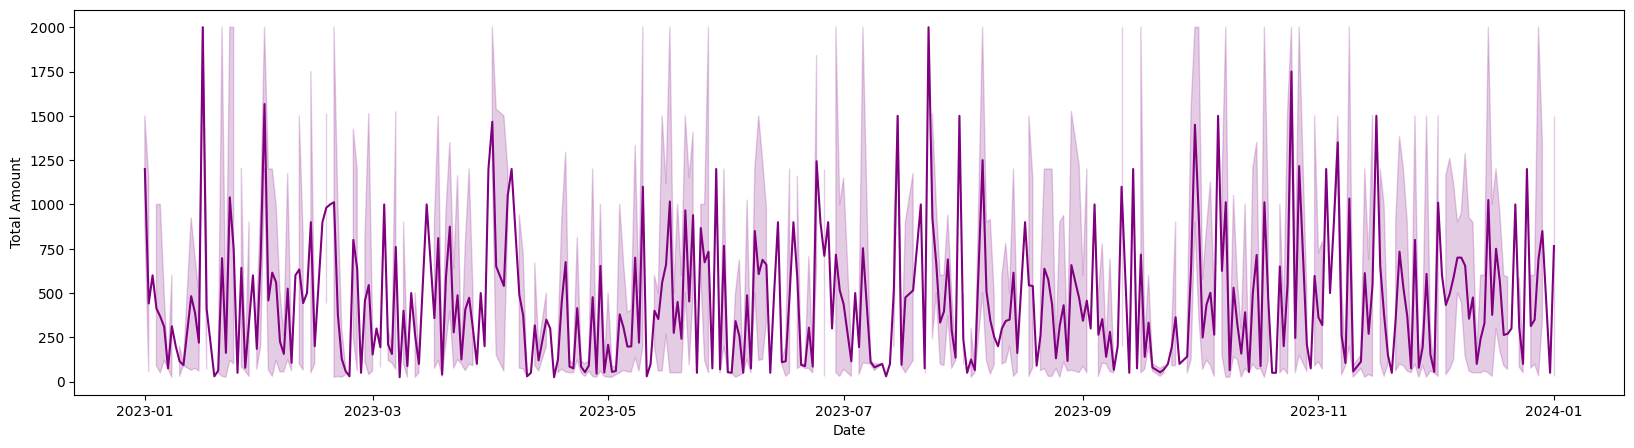

In [79]:
#OBTAINING A PLOT OF TOTAL AMOUNT OF PARTICULAR DATES WITH SEABORN
plt.figure(figsize = (20,5))
sns.lineplot(x = "Date", y = "Total Amount", data = df, color = 'purple')
plt.show()

In [69]:
#CREATING MONTH AND DATE 
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [70]:
#CALCULATING TOTAL MONTHYLY_SALES
Monthly_sales = df.groupby(["Year","Month"], as_index = False)["Total Amount"].sum()
df['Monthly_sales'] = Monthly_sales['Total Amount']

In [65]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Age group'],
      dtype='object')


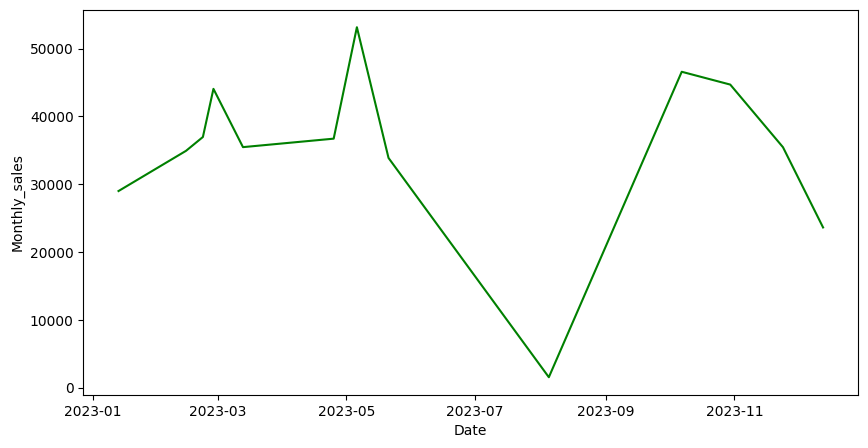

In [80]:
#A LINE PLOT OF TOTAL_MONTHLY SALES THROUGHOUT THE YEAR
plt.figure(figsize = (10,5))
sns.lineplot(x = "Date", y = "Monthly_sales", data =df,color = 'green')
plt.show()

In [45]:
#DELECTING MONTH, YEAR, MONTHLY SALES COLUMNS FOR CUSTOMER AND PRODUCT ANALYSIS
df = df.drop(['Month', 'Year', 'Monthly_sales'], axis=1, errors='ignore')
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age group
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500,40-49
179,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900,40-49
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,30-39
302,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90,10-19
978,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25,10-19


CUSTOMER AND PRODUCT ANALYSIS

In [30]:
#CREATING AGE BRACKETS
age_bins = [10,20,30,40,50,60]
age_labels = ['10-19','20-29','30-39','40-49','50+']
df["Age group"] = pd.cut(df["Age"],bins = age_bins, labels = age_labels, right = True)

In [31]:
#CALCULATING TOTAL AMOUNT SPENT BY EACH AGE GROUP
Total_amount_by_age = df.groupby('Age group')['Total Amount'].sum()
print(Total_amount_by_age)

Age group
10-19     34730
20-29     98215
30-39     95950
40-49     93795
50+      100085
Name: Total Amount, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_17144\1322295874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_amount_by_age = df.groupby('Age group')['Total Amount'].sum()


In [32]:
#GROUPING BY AGE GROUP AND PRODUCT CATEGORY, AND CALCULATING THE SUM OF SPENDING
Grouped_data = df.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_17144\1124276687.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Grouped_data = df.groupby(['Age group', 'Product Category'])['Total Amount'].sum().reset_index()


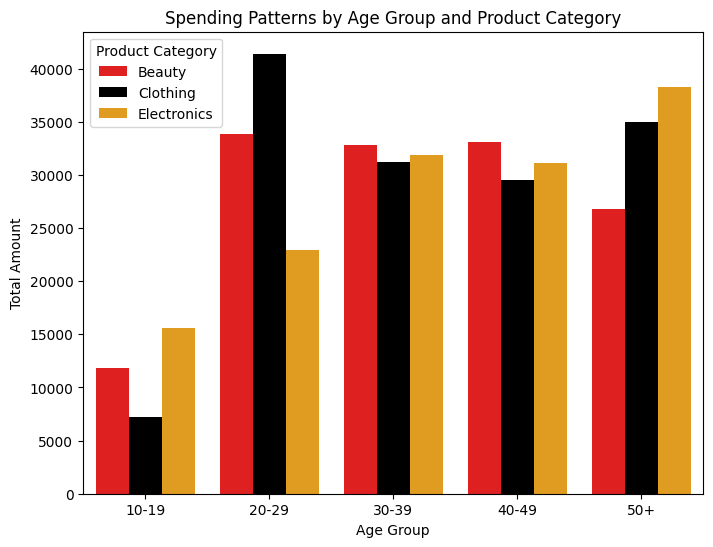

In [56]:
#CREATING A BAR PLOT TO VISULAIZE THE SPENDING PATTERNS BY AGE GROUP AND PRODUCT CATEGORIES
custom_palette = {'Beauty': 'red','Clothing': 'black','Electronics': 'orange'}
# Define a custom color palette with correct category names
plt.figure(figsize=(,6))
sns.barplot(x='Age group', y='Total Amount', hue='Product Category', data=Grouped_data, palette=custom_palette)
plt.title('Spending Patterns by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()


In [34]:
#CALCULATING THE TOTAL AMOUNT THAT HAS SPEND BY EACH GENDER
Gender_Totalspend = df.groupby('Gender')['Total Amount'].sum().reset_index()
print(Gender_Totalspend)

   Gender  Total Amount
0  Female        232840
1    Male        223160


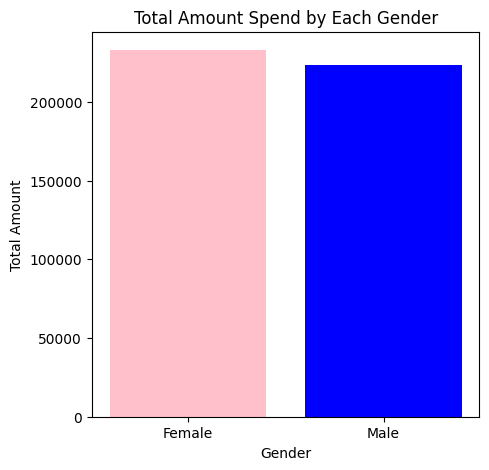

In [74]:
#OBTAINING THE TOTAL SPEND IN A BAR CHART FOR EACH GENDER
plt.figure(figsize = (5,5))
plt.bar(Gender_Totalspend['Gender'], Gender_Totalspend['Total Amount'], color = ['pink','blue'])
plt.title('Total Amount Spend by Each Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [36]:
#PRODUCT PREFERENCE BY GEN
Gender_preference = df.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()

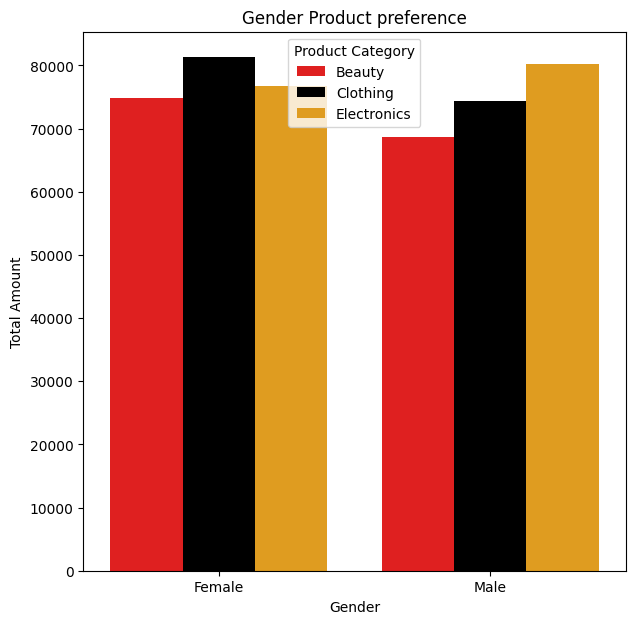

In [55]:
#A BAR PLOT OF PRODUCTS SHOWING PREFERENCE BY TOTAL AMOUNT SPEND ON EACH PRODUCT BY EACH GENDER
custom_palette = {'Beauty': 'red','Clothing': 'black','Electronics': 'orange'}
plt.figure(figsize = (7,7))
sns.barplot(x = 'Gender', y = 'Total Amount', hue ='Product Category', data = Gender_preference,palette=custom_palette)
plt.title('Gender Product preference')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

In [38]:
#TOTAL AMOUNT SPEND BY THE AVERAGE MALE AND FEMALE
Avg_amount_by_Gender = df.groupby('Gender')['Total Amount'].mean()
print(Avg_amount_by_Gender)

Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


In [39]:
#TOTAL REVENUE FOR EACH PRODUCT CATEGORY
Total_revenue = df.groupby('Product Category')['Total Amount'].sum().reset_index()
print(Total_revenue)

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


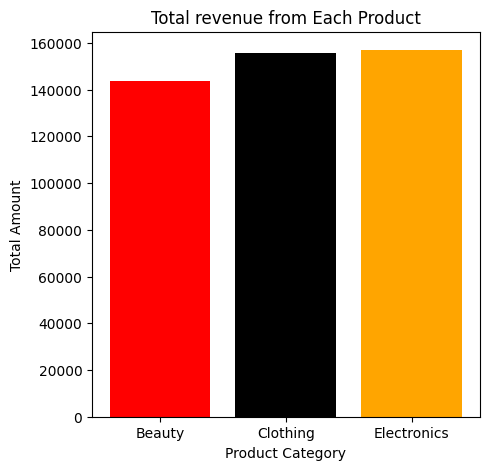

In [54]:
plt.figure(figsize = (5,5))
plt.bar(Total_revenue['Product Category'],Total_revenue['Total Amount'], color = ['red','black','orange'])
plt.title('Total revenue from Each Product')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

In [41]:
Total_num = df.groupby('Product Category')['Quantity'].sum().reset_index()
print(Total_num)

  Product Category  Quantity
0           Beauty       771
1         Clothing       894
2      Electronics       849
